In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, f1_score, recall_score, 
                           cohen_kappa_score, confusion_matrix, 
                           roc_curve, auc, classification_report)
from scipy.stats import rankdata
from sklearn.preprocessing import label_binarize
from xanfis import GdAnfisClassifier
from scipy.stats import wilcoxon, friedmanchisquare, shapiro
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
np.random.seed(42)

In [3]:
df = pd.read_csv("RedWineQuality/winequality-red.csv")

print(df.head())
print("*"*100)
print(df.describe().T)
print("*"*100)
print(df.info())
print("*"*100)
print(df.columns)
print("*"*100)
print(df.isnull().sum())
print("*"*100)
print(df.nunique())
print("*"*100)
print(df.duplicated().sum())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

--> INICIANDO EXPERIMENTO COMPLETO DE CLASSIFICAÇÃO
--> Algoritmos: KNN, SVM, Naive Bayes, ANFIS
--> Target: quality
--> Informações do Dataset:
  Shape original: (1599, 12)
  Colunas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

--> Dados ausentes:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

--> Distribuição da variável target 'quality':
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
Proporções:
quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: proportion, dtype: float64

--> Classes 

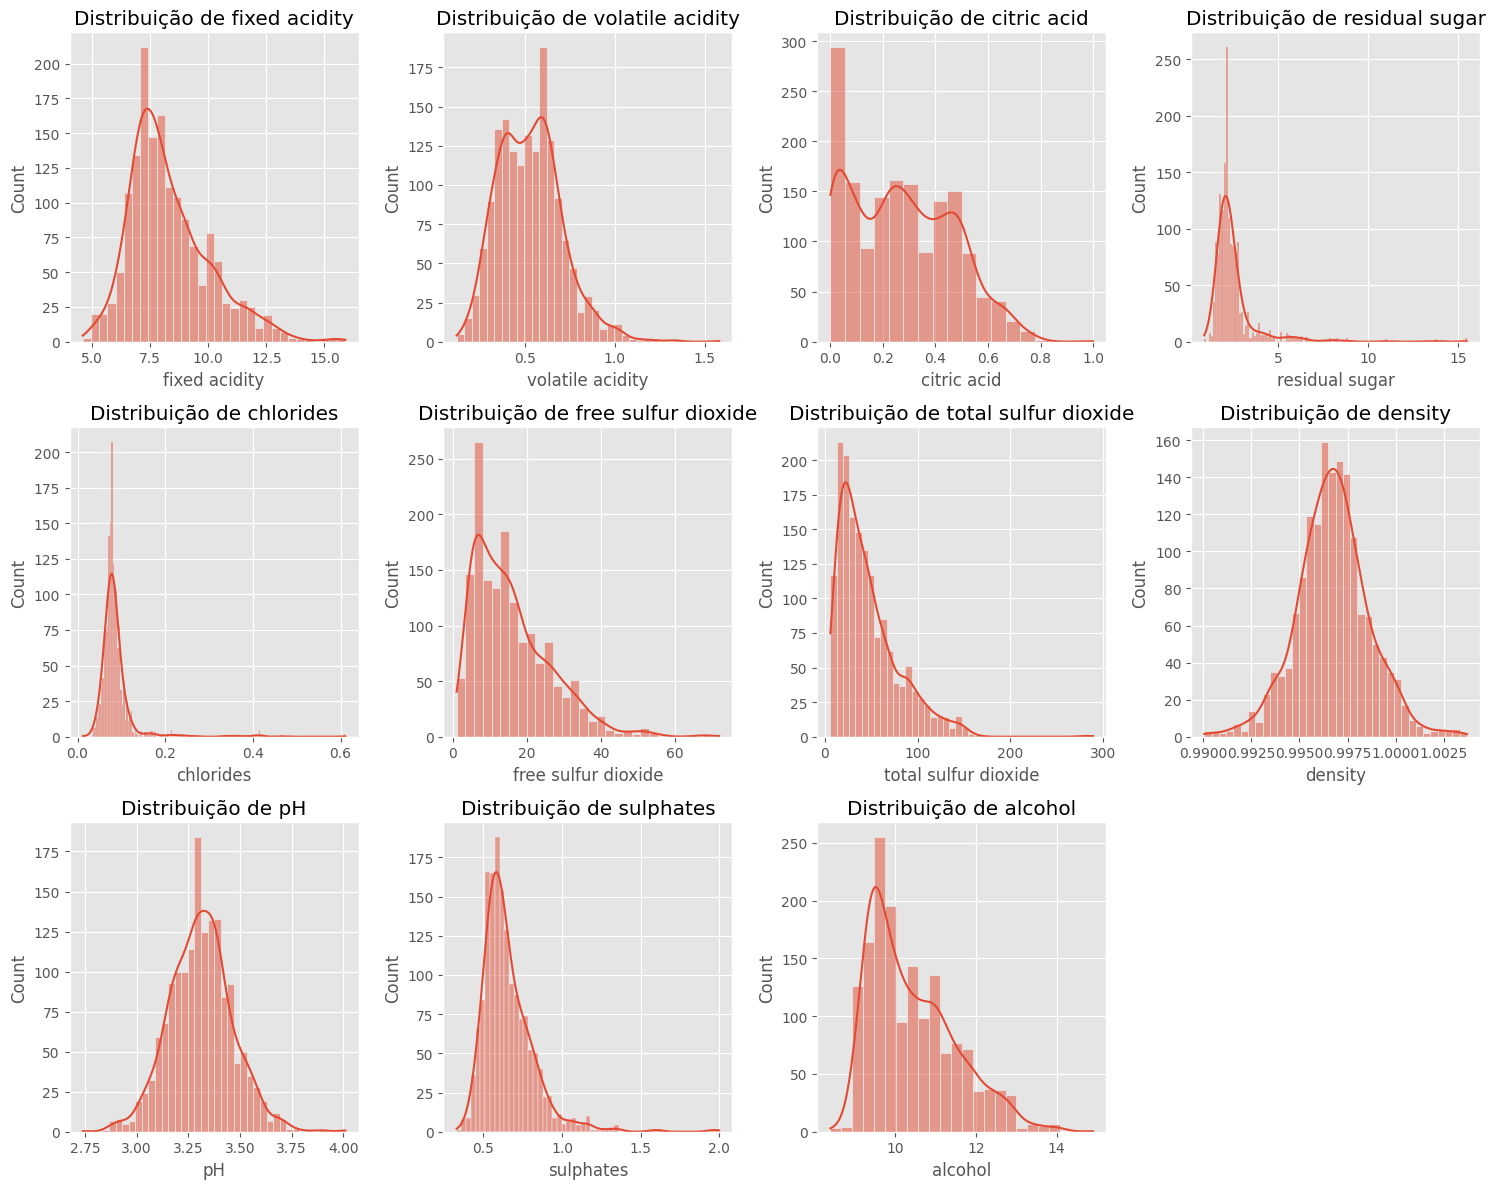

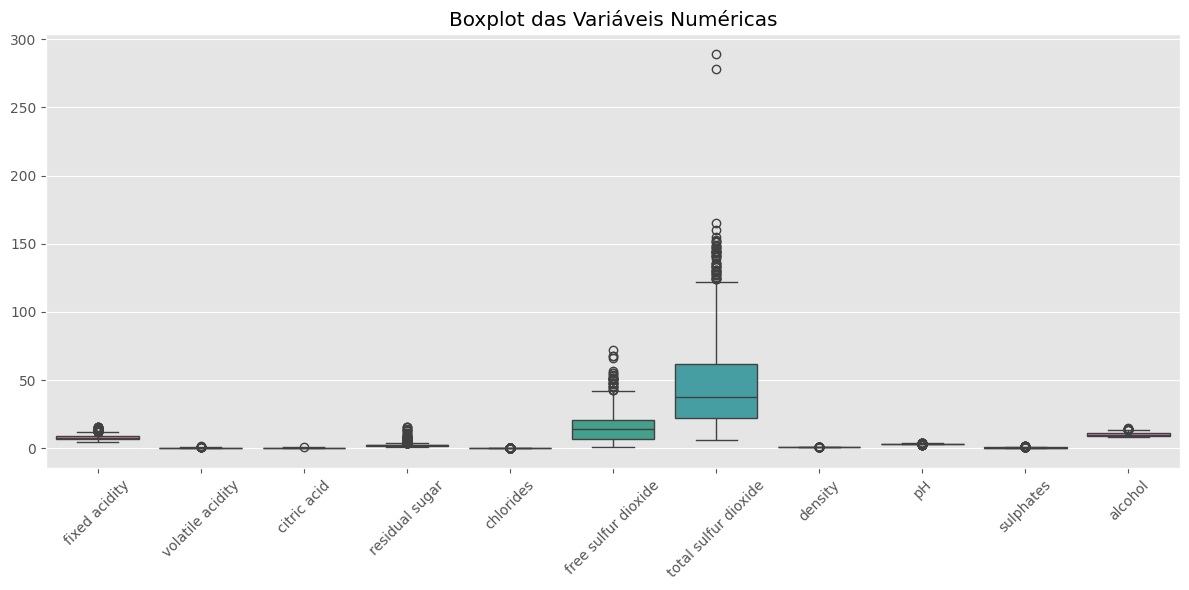

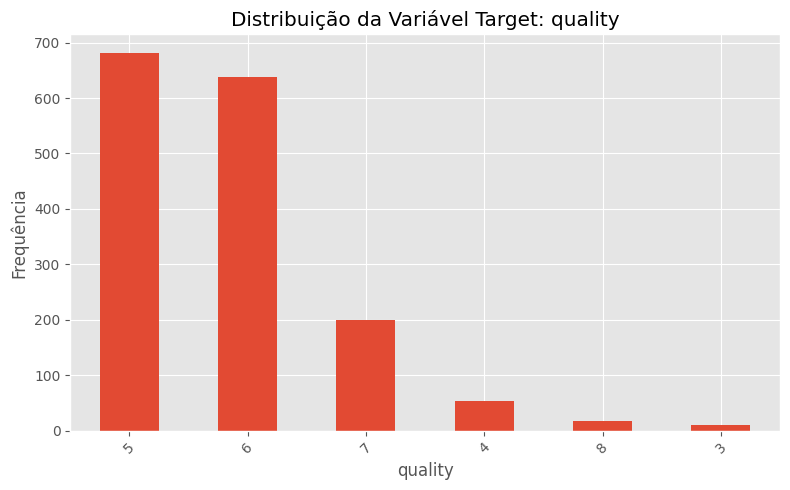

--> Usando divisão estratificada (min samples por classe: 10)
--> Divisão 80/20:
  Treino: 1087 amostras
  Teste: 272 amostras

--> Distribuição no treino:
  3: 8 (0.7%)
  4: 42 (3.9%)
  5: 461 (42.4%)
  6: 428 (39.4%)
  7: 134 (12.3%)
  8: 14 (1.3%)

--> Distribuição no teste:
  3: 2 (0.7%)
  4: 11 (4.0%)
  5: 116 (42.6%)
  6: 107 (39.3%)
  7: 33 (12.1%)
  8: 3 (1.1%)

--> OTIMIZAÇÃO DE HIPERPARÂMETROS
--> Otimizando hiperparâmetros do KNN...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
--> Melhores parâmetros KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 29, 'knn__weights': 'distance'}
--> Melhor score CV: 0.5660
--> Otimizando hiperparâmetros do SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
--> Melhores parâmetros SVM: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
--> Melhor score CV: 0.5768
--> Otimizando hiperparâmetros do Naive Bayes...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
--> Melhores parâmetr

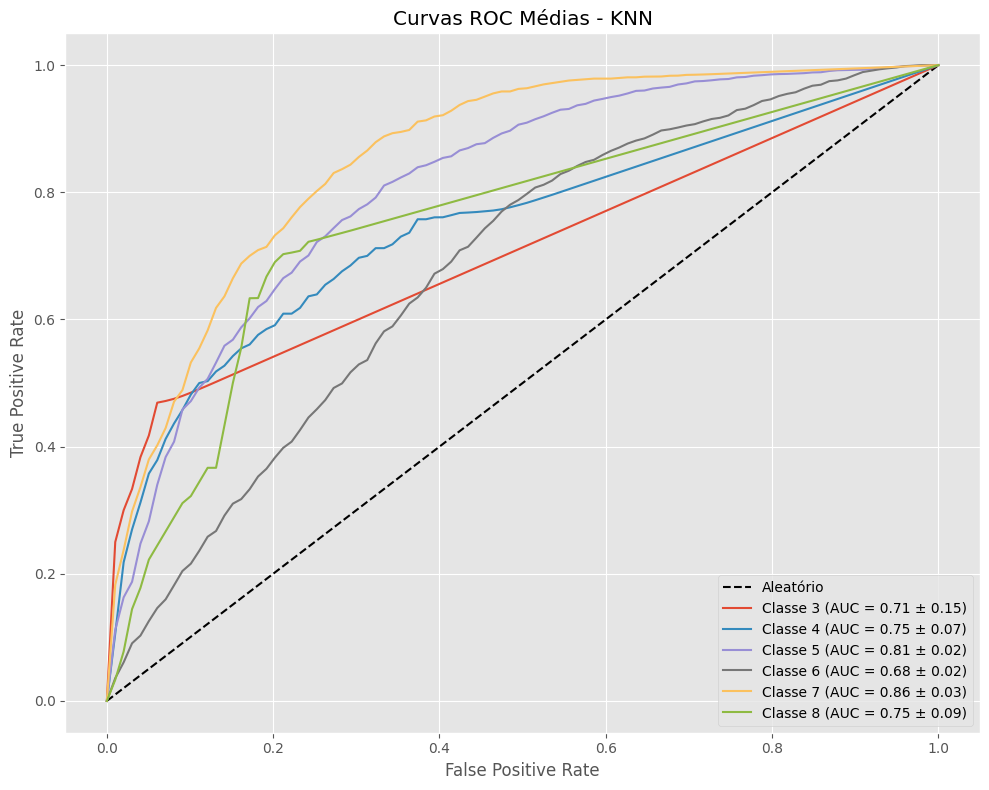

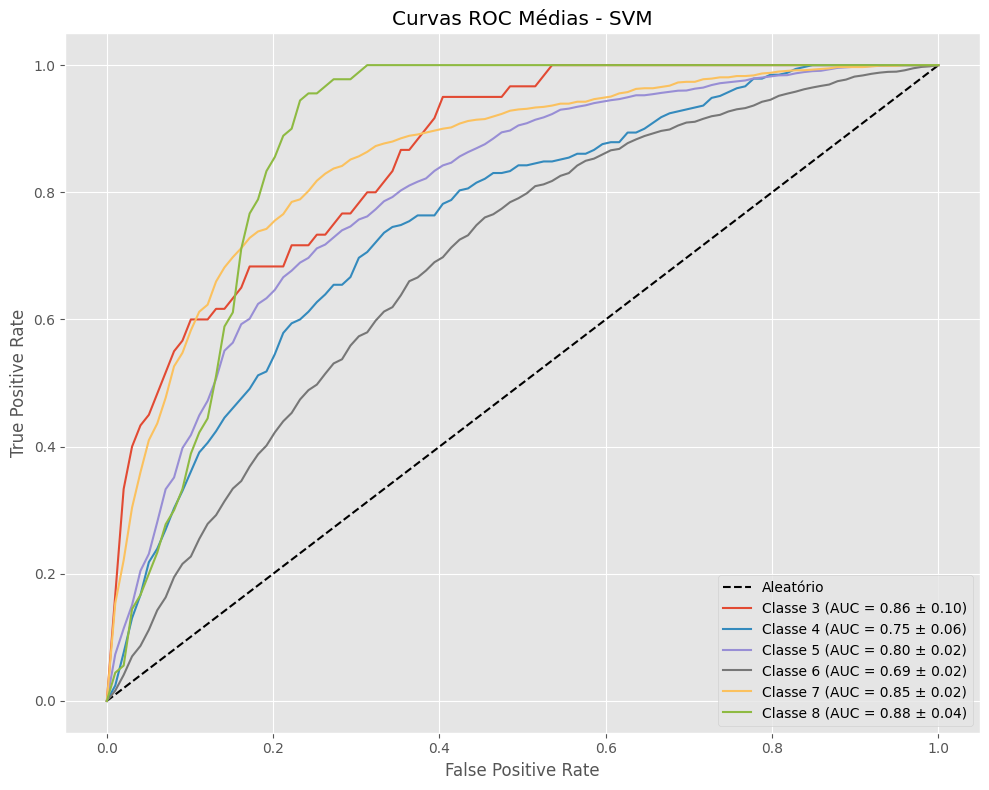

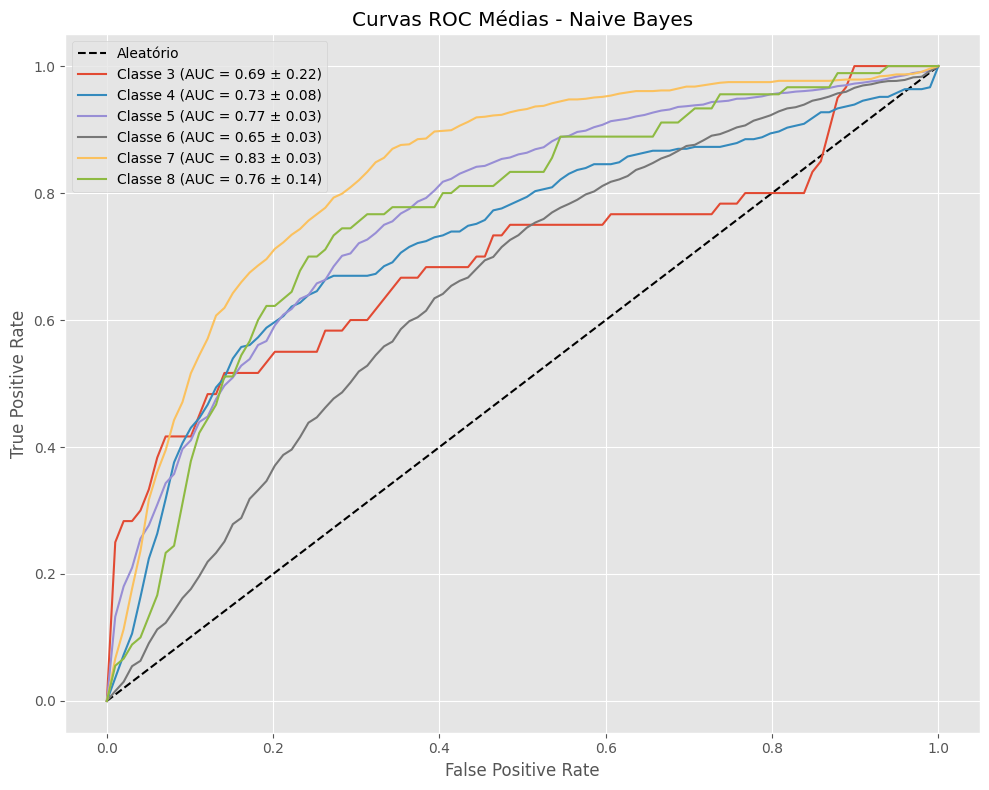

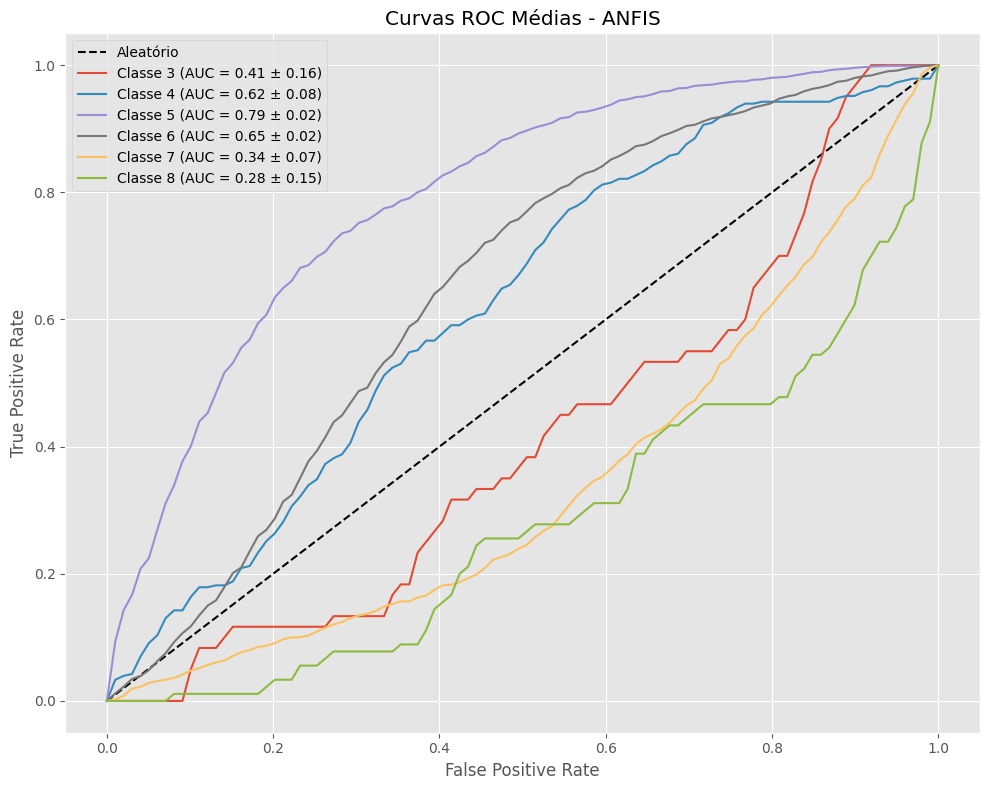


--> MATRIZES DE CONFUSÃO


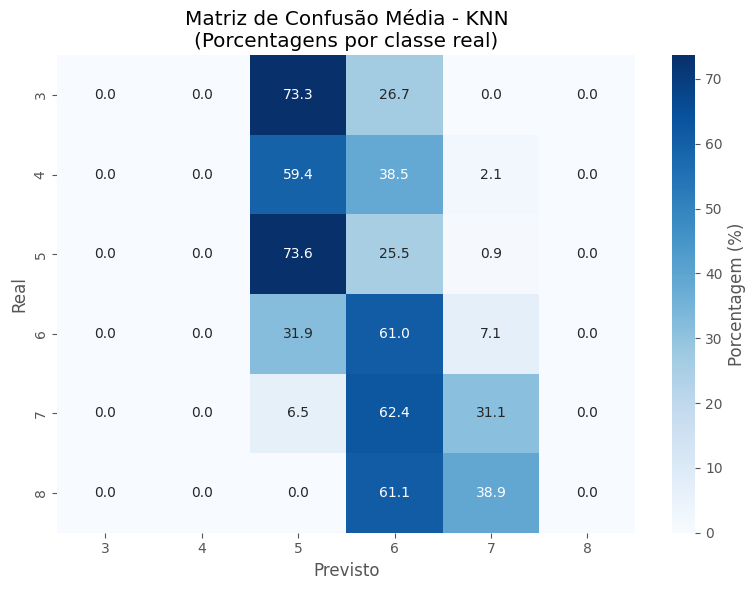

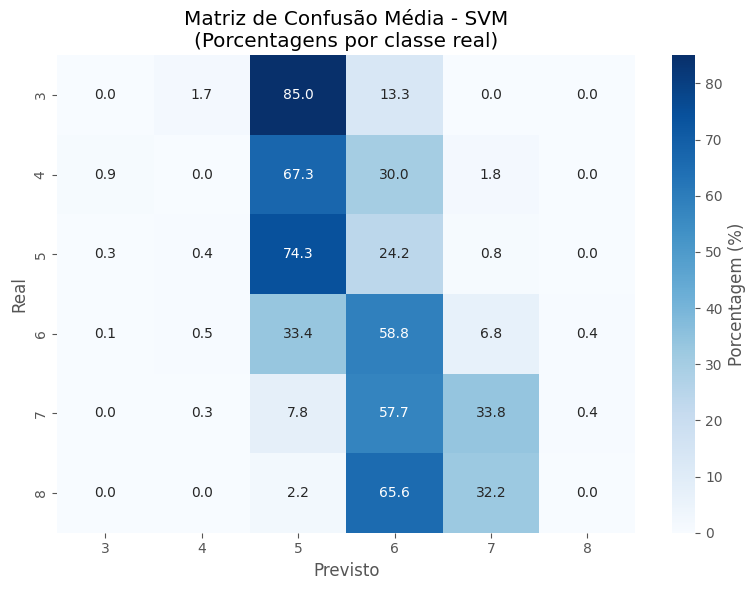

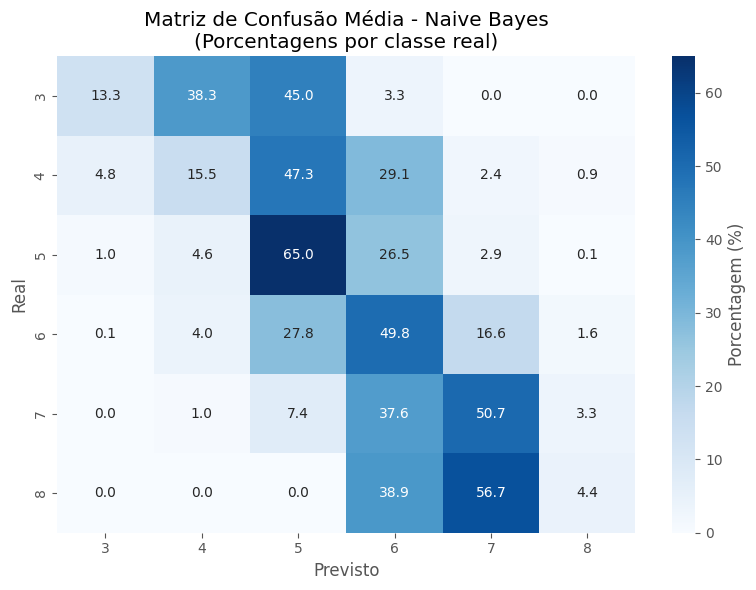

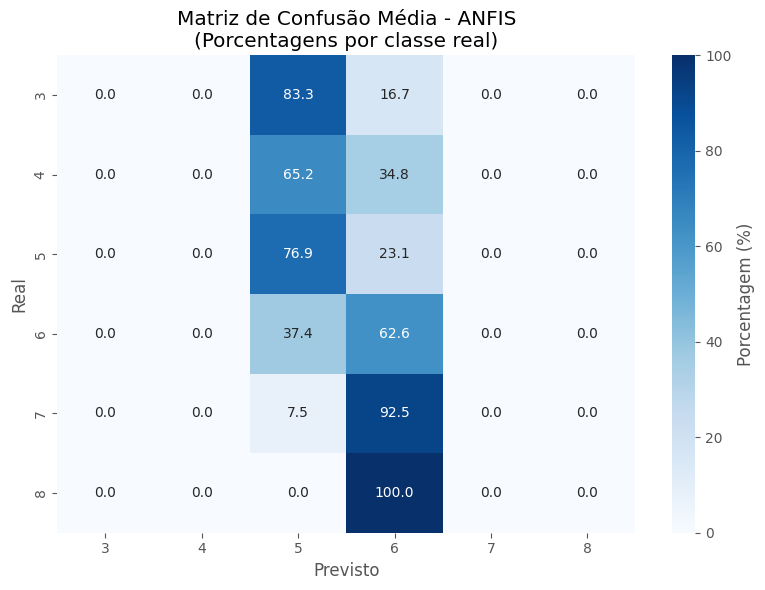


--> COMPARAÇÃO DOS MODELOS


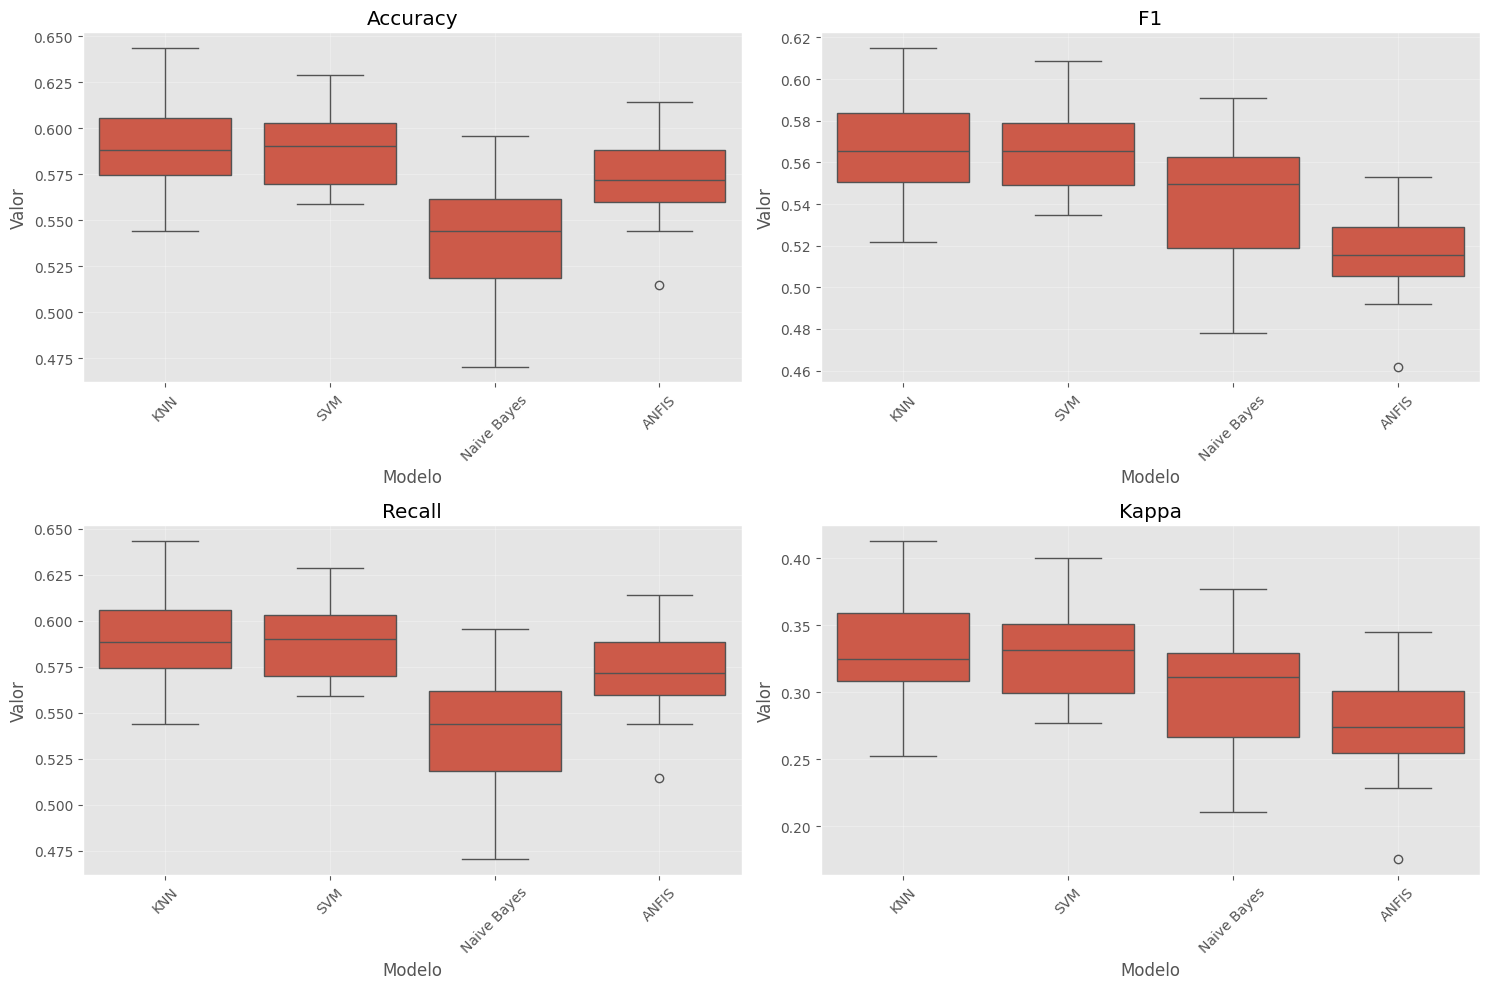


--> ANÁLISE ESTATÍSTICA DETALHADA

--> ACCURACY
------------------------------
KNN          - 0.5918 ± 0.0244
SVM          - 0.5891 ± 0.0206
Naive Bayes  - 0.5423 ± 0.0304
ANFIS        - 0.5741 ± 0.0212

Friedman: Q=45.5816, p=0.000000
Diferenças significativas encontradas
Post-hoc Nemenyi (CD=0.856):
  1º: KNN (1.75)
  2º: SVM (1.88)
  3º: ANFIS (2.63)
  4º: Naive Bayes (3.73)
  KNN vs Naive Bayes: KNN superior
  KNN vs ANFIS: KNN superior
  SVM vs Naive Bayes: SVM superior
  Naive Bayes vs ANFIS: ANFIS superior

--> F1
------------------------------
KNN          - 0.5672 ± 0.0239
SVM          - 0.5668 ± 0.0198
Naive Bayes  - 0.5440 ± 0.0285
ANFIS        - 0.5174 ± 0.0191

Friedman: Q=50.3200, p=0.000000
Diferenças significativas encontradas
Post-hoc Nemenyi (CD=0.856):
  1º: KNN (1.73)
  2º: SVM (1.80)
  3º: Naive Bayes (2.67)
  4º: ANFIS (3.80)
  KNN vs Naive Bayes: KNN superior
  KNN vs ANFIS: KNN superior
  SVM vs Naive Bayes: SVM superior
  SVM vs ANFIS: SVM superior
  Naive Bay

In [ ]:
class ClassificacaoExperimento:
    def __init__(self, dataset_path, target_column):
        self.dataset_path = dataset_path
        self.target_column = target_column
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = MinMaxScaler()
        self.label_encoder = LabelEncoder()
        
    def carregar_dados(self):
        df = pd.read_csv(self.dataset_path)
        
        print("--> Informações do Dataset:")
        print(f"  Shape original: {df.shape}")
        print(f"  Colunas: {list(df.columns)}")
        
        print(f"\n--> Dados ausentes:")
        print(df.isnull().sum())
        
        print(f"\n--> Distribuição da variável target '{self.target_column}':")
        print(df[self.target_column].value_counts())
        print(f"Proporções:")
        print(df[self.target_column].value_counts(normalize=True))
        
        class_counts = df[self.target_column].value_counts()
        classes_validas = class_counts[class_counts >= 10].index
        
        print(f"\n--> Classes com poucos exemplos removidas:")
        classes_removidas = class_counts[class_counts < 10]
        if len(classes_removidas) > 0:
            for classe, count in classes_removidas.items():
                print(f"  {classe}: {count} exemplos (removida)")
        else:
            print("  Nenhuma classe removida")
        
        df_filtrado = df[df[self.target_column].isin(classes_validas)].copy()
        
        print(f"\n--> Dataset após filtro:")
        print(f"  Shape: {df_filtrado.shape}")
        print(f"  Classes restantes: {sorted(df_filtrado[self.target_column].unique())}")
        print(f"  Distribuição filtrada:")
        print(df_filtrado[self.target_column].value_counts())
        
        print(f"\n--> Tratando variáveis categóricas...")
        target_values = df_filtrado[self.target_column].copy()
        df_features = df_filtrado.drop(self.target_column, axis=1)
        
        df_features = df_features.drop(['Volatile_cat', 'sulphates_cat', 'alcohol_cat'], 
                                      axis=1, errors='ignore')
        
        df_processed = df_features.copy()
        df_processed[self.target_column] = target_values
        
        print(f"Colunas após processamento: {list(df_processed.columns)}")
        
        duplicatas_antes = df_processed.duplicated().sum()
        df_processed.drop_duplicates(inplace=True)
        duplicatas_depois = df_processed.duplicated().sum()
        print(f"Duplicatas removidas: {duplicatas_antes - duplicatas_depois}")
        
        self.X = df_processed.drop(self.target_column, axis=1).values
        self.y = df_processed[self.target_column].values
        
        self.feature_names = df_processed.drop(self.target_column, axis=1).columns.tolist()
        self.classes = np.unique(self.y)
        
        print(f"\n--> Dataset preparado:")
        print(f"  Amostras: {self.X.shape[0]}")
        print(f"  Features: {self.X.shape[1]}")
        print(f"  Classes: {self.classes}")
        print(f"  Distribuição final por classe:")
        unique, counts = np.unique(self.y, return_counts=True)
        for classe, count in zip(unique, counts):
            print(f"    {classe}: {count} exemplos")
        
    def dividir_dados(self, test_size=0.2, random_state=42):
        unique, counts = np.unique(self.y, return_counts=True)
        min_samples = np.min(counts)
        
        if min_samples >= 2:
            print(f"--> Usando divisão estratificada (min samples por classe: {min_samples})")
            stratify = self.y
        else:
            print(f"--> Divisão simples sem estratificação (min samples por classe: {min_samples})")
            stratify = None
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state, 
            stratify=stratify
        )
        
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)
        
        print(f"--> Divisão 80/20:")
        print(f"  Treino: {self.X_train.shape[0]} amostras")
        print(f"  Teste: {self.X_test.shape[0]} amostras")
        
        print(f"\n--> Distribuição no treino:")
        unique, counts = np.unique(self.y_train, return_counts=True)
        for classe, count in zip(unique, counts):
            print(f"  {classe}: {count} ({count/len(self.y_train)*100:.1f}%)")
        
        print(f"\n--> Distribuição no teste:")
        unique, counts = np.unique(self.y_test, return_counts=True)
        for classe, count in zip(unique, counts):
            print(f"  {classe}: {count} ({count/len(self.y_test)*100:.1f}%)")

    def plotar_distribuicoes_iniciais(self):
        df = pd.read_csv(self.dataset_path)
        
        df_processed = df.drop(['Volatile_cat', 'sulphates_cat', 'alcohol_cat'], 
                              axis=1, errors='ignore')
        
        numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
        numeric_cols = [col for col in numeric_cols if col != self.target_column]
        
        if len(numeric_cols) > 0:
            n_cols = min(4, len(numeric_cols))
            n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
            
            plt.figure(figsize=(15, 4*n_rows))
            for i, col in enumerate(numeric_cols, 1):
                plt.subplot(n_rows, n_cols, i)
                plt.title(f"Distribuição de {col}")
                sns.histplot(df_processed[col], kde=True)
                plt.tight_layout()
            plt.show()
        
        plt.figure(figsize=(12, 6))
        numeric_data = df_processed.select_dtypes(include=[np.number])
        numeric_data = numeric_data.drop(self.target_column, axis=1, errors='ignore')
        sns.boxplot(data=numeric_data)
        plt.xticks(rotation=45)
        plt.title('Boxplot das Variáveis Numéricas')
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(8, 5))
        df[self.target_column].value_counts().plot(kind='bar')
        plt.title(f'Distribuição da Variável Target: {self.target_column}')
        plt.xticks(rotation=45)
        plt.ylabel('Frequência')
        plt.tight_layout()
        plt.show()

    def otimizar_knn(self):
        print("--> Otimizando hiperparâmetros do KNN...")
        
        pipeline = Pipeline([
            ('scaler', MinMaxScaler()),
            ('knn', KNeighborsClassifier())
        ])
        
        param_grid = {
            'knn__n_neighbors': list(range(1, 51, 2)),
            'knn__weights': ['uniform', 'distance'],
            'knn__metric': ['euclidean', 'manhattan']
        }
        
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=5, scoring='f1_weighted', 
            n_jobs=-1, verbose=1
        )
        
        grid_search.fit(self.X_train, self.y_train)
        
        self.best_knn_params = grid_search.best_params_
        print(f"--> Melhores parâmetros KNN: {self.best_knn_params}")
        print(f"--> Melhor score CV: {grid_search.best_score_:.4f}")
        
        return self.best_knn_params

    def otimizar_svm(self):
        print("--> Otimizando hiperparâmetros do SVM...")
        
        pipeline = Pipeline([
            ('scaler', MinMaxScaler()),
            ('svm', SVC(probability=True))
        ])
        
        param_grid = {
            'svm__C': [0.1, 1, 10, 100],
            'svm__kernel': ['linear', 'rbf', 'poly'],
            'svm__gamma': ['scale', 'auto']
        }
        
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=5, scoring='f1_weighted', 
            n_jobs=-1, verbose=1
        )
        
        grid_search.fit(self.X_train, self.y_train)
        
        self.best_svm_params = grid_search.best_params_
        print(f"--> Melhores parâmetros SVM: {self.best_svm_params}")
        print(f"--> Melhor score CV: {grid_search.best_score_:.4f}")
        
        return self.best_svm_params

    def otimizar_naive_bayes(self):
        print("--> Otimizando hiperparâmetros do Naive Bayes...")
        
        param_grid = {
            'var_smoothing': np.logspace(-9, -6, 10)
        }
        
        grid_search = GridSearchCV(
            GaussianNB(), param_grid, cv=5, scoring='f1_weighted', 
            n_jobs=-1, verbose=1
        )
        
        grid_search.fit(self.X_train_scaled, self.y_train)
        
        self.best_nb_params = grid_search.best_params_
        print(f"--> Melhores parâmetros Naive Bayes: {self.best_nb_params}")
        print(f"--> Melhor score CV: {grid_search.best_score_:.4f}")
        
        return self.best_nb_params

    def otimizar_anfis(self):
        print("--> Otimizando hiperparâmetros do ANFIS...")
        
        param_combinations = [
            {'num_rules': 8, 'epochs': 30, 'lr': 0.01},
            {'num_rules': 16, 'epochs': 50, 'lr': 0.01},
            {'num_rules': 32, 'epochs': 50, 'lr': 0.005},
        ]
        
        best_score = 0
        best_params = None
        
        y_train_encoded = self.label_encoder.fit_transform(self.y_train)
        
        for params in param_combinations:
            print(f"Testando: {params}")
            
            try:
                model = GdAnfisClassifier(
                    num_rules=params['num_rules'],
                    mf_class="Gaussian",
                    epochs=params['epochs'],
                    batch_size=16,
                    optim="Adam",
                    optim_params={"lr": params['lr']},
                    verbose=False
                )
                
                scores = []
                for i in range(3):
                    X_fold_train, X_fold_val, y_fold_train, y_fold_val = train_test_split(
                        self.X_train_scaled, y_train_encoded, test_size=0.2, 
                        random_state=i, stratify=y_train_encoded
                    )
                    
                    model.fit(X_fold_train, y_fold_train)
                    y_pred = model.predict(X_fold_val)
                    score = accuracy_score(y_fold_val, y_pred)
                    scores.append(score)
                
                avg_score = np.mean(scores)
                print(f"Score médio: {avg_score:.4f}")
                
                if avg_score > best_score:
                    best_score = avg_score
                    best_params = params
                    
            except Exception as e:
                print(f"Erro com parâmetros {params}: {str(e)}")
                continue
        
        if best_params is None:
            best_params = {'num_rules': 8, 'epochs': 30, 'lr': 0.01}
            print("--> Usando parâmetros padrão para ANFIS")
        
        self.best_anfis_params = best_params
        print(f"--> Melhores parâmetros ANFIS: {self.best_anfis_params}")
        print(f"--> Melhor score CV: {best_score:.4f}")
        
        return self.best_anfis_params

    def executar_experimentos_knn(self, n_seeds=30):
        print("--> Executando experimentos KNN (30 sementes)...")
        
        resultados = {
            'accuracy': [], 'f1': [], 'recall': [], 'kappa': [],
            'y_tests': [], 'y_preds': [], 'y_probas': []
        }
        
        for seed in range(1, n_seeds + 1):
            X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
                self.X, self.y, test_size=0.2, random_state=seed, stratify=self.y
            )
            
            knn_params_clean = {}
            for k, v in self.best_knn_params.items():
                knn_params_clean[k.replace('knn__', '')] = v
            
            pipeline = Pipeline([
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(**knn_params_clean))
            ])
            
            pipeline.fit(X_train_exp, y_train_exp)
            y_pred = pipeline.predict(X_test_exp)
            y_proba = pipeline.predict_proba(X_test_exp)
            
            resultados['accuracy'].append(accuracy_score(y_test_exp, y_pred))
            resultados['f1'].append(f1_score(y_test_exp, y_pred, average='weighted', zero_division=0))
            resultados['recall'].append(recall_score(y_test_exp, y_pred, average='weighted', zero_division=0))
            resultados['kappa'].append(cohen_kappa_score(y_test_exp, y_pred))
            resultados['y_tests'].append(y_test_exp)
            resultados['y_preds'].append(y_pred)
            resultados['y_probas'].append(y_proba)
            
            if seed % 10 == 0:
                print(f"  Completadas {seed} execuções...")
        
        self.resultados_knn = resultados
        return resultados

    def executar_experimentos_svm(self, n_seeds=30):
        print("--> Executando experimentos SVM (30 sementes)...")
        
        resultados = {
            'accuracy': [], 'f1': [], 'recall': [], 'kappa': [],
            'y_tests': [], 'y_preds': [], 'y_probas': []
        }
        
        for seed in range(1, n_seeds + 1):
            X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
                self.X, self.y, test_size=0.2, random_state=seed, stratify=self.y
            )
            
            svm_params_clean = {}
            for k, v in self.best_svm_params.items():
                svm_params_clean[k.replace('svm__', '')] = v
            
            pipeline = Pipeline([
                ('scaler', MinMaxScaler()),
                ('svm', SVC(**svm_params_clean, probability=True))
            ])
            
            pipeline.fit(X_train_exp, y_train_exp)
            y_pred = pipeline.predict(X_test_exp)
            y_proba = pipeline.predict_proba(X_test_exp)
            
            resultados['accuracy'].append(accuracy_score(y_test_exp, y_pred))
            resultados['f1'].append(f1_score(y_test_exp, y_pred, average='weighted', zero_division=0))
            resultados['recall'].append(recall_score(y_test_exp, y_pred, average='weighted', zero_division=0))
            resultados['kappa'].append(cohen_kappa_score(y_test_exp, y_pred))
            resultados['y_tests'].append(y_test_exp)
            resultados['y_preds'].append(y_pred)
            resultados['y_probas'].append(y_proba)
            
            if seed % 10 == 0:
                print(f"  Completadas {seed} execuções...")
        
        self.resultados_svm = resultados
        return resultados

    def executar_experimentos_naive_bayes(self, n_seeds=30):
        print("--> Executando experimentos Naive Bayes (30 sementes)...")
        
        resultados = {
            'accuracy': [], 'f1': [], 'recall': [], 'kappa': [],
            'y_tests': [], 'y_preds': [], 'y_probas': []
        }
        
        for seed in range(1, n_seeds + 1):
            X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
                self.X, self.y, test_size=0.2, random_state=seed, stratify=self.y
            )
            
            scaler_exp = MinMaxScaler()
            X_train_scaled = scaler_exp.fit_transform(X_train_exp)
            X_test_scaled = scaler_exp.transform(X_test_exp)
            
            model = GaussianNB(**self.best_nb_params)
            model.fit(X_train_scaled, y_train_exp)
            y_pred = model.predict(X_test_scaled)
            y_proba = model.predict_proba(X_test_scaled)
            
            resultados['accuracy'].append(accuracy_score(y_test_exp, y_pred))
            resultados['f1'].append(f1_score(y_test_exp, y_pred, average='weighted', zero_division=0))
            resultados['recall'].append(recall_score(y_test_exp, y_pred, average='weighted', zero_division=0))
            resultados['kappa'].append(cohen_kappa_score(y_test_exp, y_pred))
            resultados['y_tests'].append(y_test_exp)
            resultados['y_preds'].append(y_pred)
            resultados['y_probas'].append(y_proba)
            
            if seed % 10 == 0:
                print(f"  Completadas {seed} execuções...")
        
        self.resultados_nb = resultados
        return resultados

    def executar_experimentos_anfis(self, n_seeds=30):
        print("--> Executando experimentos ANFIS (30 sementes)...")
        
        resultados = {
            'accuracy': [], 'f1': [], 'recall': [], 'kappa': [],
            'y_tests': [], 'y_preds': [], 'y_probas': []
        }
        
        for seed in range(1, n_seeds + 1):
            try:
                X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
                    self.X, self.y, test_size=0.2, random_state=seed, stratify=self.y
                )
                
                scaler_exp = MinMaxScaler()
                X_train_scaled = scaler_exp.fit_transform(X_train_exp)
                X_test_scaled = scaler_exp.transform(X_test_exp)
                
                label_encoder_exp = LabelEncoder()
                y_train_encoded = label_encoder_exp.fit_transform(y_train_exp)
                y_test_encoded = label_encoder_exp.transform(y_test_exp)
                
                model = GdAnfisClassifier(
                    num_rules=self.best_anfis_params['num_rules'],
                    mf_class="Gaussian",
                    epochs=self.best_anfis_params['epochs'],
                    batch_size=16,
                    optim="Adam",
                    optim_params={"lr": self.best_anfis_params['lr']},
                    verbose=False
                )
                
                model.fit(X_train_scaled, y_train_encoded)
                y_pred_encoded = model.predict(X_test_scaled)
                y_proba = model.predict_proba(X_test_scaled)
                
                y_pred = label_encoder_exp.inverse_transform(y_pred_encoded)
                
                resultados['accuracy'].append(accuracy_score(y_test_exp, y_pred))
                resultados['f1'].append(f1_score(y_test_exp, y_pred, average='weighted', zero_division=0))
                resultados['recall'].append(recall_score(y_test_exp, y_pred, average='weighted', zero_division=0))
                resultados['kappa'].append(cohen_kappa_score(y_test_exp, y_pred))
                resultados['y_tests'].append(y_test_exp)
                resultados['y_preds'].append(y_pred)
                resultados['y_probas'].append(y_proba)
                
            except Exception as e:
                print(f"--> Erro na execução {seed}: {str(e)}")
                resultados['accuracy'].append(0.0)
                resultados['f1'].append(0.0)
                resultados['recall'].append(0.0)
                resultados['kappa'].append(0.0)
                resultados['y_tests'].append(np.array([]))
                resultados['y_preds'].append(np.array([]))
                resultados['y_probas'].append(np.array([]))
            
            if seed % 10 == 0:
                print(f"  Completadas {seed} execuções...")
        
        self.resultados_anfis = resultados
        return resultados

    def imprimir_resultados_em_tabela(self):
        print("\n" + "="*100)
        print("--> TABELA DE RESULTADOS MÉDIOS - TODOS OS MODELOS (30 EXECUÇÕES)")
        print("="*100)
        
        modelos_stats = {}
        modelos_nomes = {
            'knn': 'KNN',
            'svm': 'SVM', 
            'nb': 'Naive Bayes',
            'anfis': 'ANFIS'
        }
        
        for modelo_key, modelo_nome in modelos_nomes.items():
            if hasattr(self, f'resultados_{modelo_key}'):
                resultados = getattr(self, f'resultados_{modelo_key}')
                modelos_stats[modelo_nome] = {}
                
                for metrica in ['accuracy', 'f1', 'recall', 'kappa']:
                    modelos_stats[modelo_nome][metrica] = {
                        'media': np.mean(resultados[metrica]),
                        'std': np.std(resultados[metrica]),
                        'min': np.min(resultados[metrica]),
                        'max': np.max(resultados[metrica])
                    }
        
        df_resultados = pd.DataFrame({
            'Métrica': ['Accuracy', 'F1-Score', 'Recall', 'Kappa']
        })
        
        for modelo_nome in modelos_stats.keys():
            df_resultados[f'{modelo_nome}_Média'] = [
                f"{modelos_stats[modelo_nome]['accuracy']['media']:.4f}",
                f"{modelos_stats[modelo_nome]['f1']['media']:.4f}",
                f"{modelos_stats[modelo_nome]['recall']['media']:.4f}",
                f"{modelos_stats[modelo_nome]['kappa']['media']:.4f}"
            ]
            df_resultados[f'{modelo_nome}_Std'] = [
                f"±{modelos_stats[modelo_nome]['accuracy']['std']:.4f}",
                f"±{modelos_stats[modelo_nome]['f1']['std']:.4f}",
                f"±{modelos_stats[modelo_nome]['recall']['std']:.4f}",
                f"±{modelos_stats[modelo_nome]['kappa']['std']:.4f}"
            ]
        
        print(df_resultados.to_string(index=False))

    def plotar_matriz_confusao_media(self, resultados, nome_modelo):
        classes = np.unique(self.y)
        matriz_total = np.zeros((len(classes), len(classes)))
        
        execucoes_validas = 0
        for y_test, y_pred in zip(resultados['y_tests'], resultados['y_preds']):
            if len(y_test) > 0 and len(y_pred) > 0:
                matriz_total += confusion_matrix(y_test, y_pred, labels=classes)
                execucoes_validas += 1
        
        if execucoes_validas == 0:
            print(f"--> Nenhuma execução válida para {nome_modelo}")
            return
            
        matriz_media = matriz_total / execucoes_validas
        
        matriz_porcentagem = np.zeros_like(matriz_media)
        for i in range(len(classes)):
            total_linha = np.sum(matriz_media[i, :])
            if total_linha > 0:
                matriz_porcentagem[i, :] = (matriz_media[i, :] / total_linha) * 100
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_porcentagem, 
                    annot=True, 
                    fmt=".1f", 
                    cmap="Blues", 
                    xticklabels=classes, 
                    yticklabels=classes,
                    cbar_kws={'label': 'Porcentagem (%)'})
        
        plt.title(f"Matriz de Confusão Média - {nome_modelo}\n(Porcentagens por classe real)")
        plt.xlabel("Previsto")
        plt.ylabel("Real")
        plt.tight_layout()
        plt.show()

    def plotar_comparacao_modelos(self):
        metricas = ['accuracy', 'f1', 'recall', 'kappa']
        
        dados_plot = []
        
        if hasattr(self, 'resultados_knn'):
            for metrica in metricas:
                for valor in self.resultados_knn[metrica]:
                    dados_plot.append({'Modelo': 'KNN', 'Métrica': metrica.title(), 'Valor': valor})
        
        if hasattr(self, 'resultados_svm'):
            for metrica in metricas:
                for valor in self.resultados_svm[metrica]:
                    dados_plot.append({'Modelo': 'SVM', 'Métrica': metrica.title(), 'Valor': valor})
        
        if hasattr(self, 'resultados_nb'):
            for metrica in metricas:
                for valor in self.resultados_nb[metrica]:
                    dados_plot.append({'Modelo': 'Naive Bayes', 'Métrica': metrica.title(), 'Valor': valor})
        
        if hasattr(self, 'resultados_anfis'):
            for metrica in metricas:
                for valor in self.resultados_anfis[metrica]:
                    dados_plot.append({'Modelo': 'ANFIS', 'Métrica': metrica.title(), 'Valor': valor})
        
        df_plot = pd.DataFrame(dados_plot)
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.ravel()
        
        for i, metrica in enumerate(['Accuracy', 'F1', 'Recall', 'Kappa']):
            data = df_plot[df_plot['Métrica'] == metrica]
            sns.boxplot(data=data, x='Modelo', y='Valor', ax=axes[i])
            axes[i].set_title(f'{metrica}')
            axes[i].grid(True, alpha=0.3)
            axes[i].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()

    def analise_estatistica(self):
        print("\n--> ANÁLISE ESTATÍSTICA DETALHADA")
        print("="*60)
        
        modelos_resultados = {}
        if hasattr(self, 'resultados_knn'):
            modelos_resultados['KNN'] = self.resultados_knn
        if hasattr(self, 'resultados_svm'):
            modelos_resultados['SVM'] = self.resultados_svm
        if hasattr(self, 'resultados_nb'):
            modelos_resultados['Naive Bayes'] = self.resultados_nb
        if hasattr(self, 'resultados_anfis'):
            modelos_resultados['ANFIS'] = self.resultados_anfis
        
        if len(modelos_resultados) < 2:
            print("Necessário pelo menos 2 modelos para análise")
            return
        
        metricas = ['accuracy', 'f1', 'recall', 'kappa']
        
        for metrica in metricas:
            print(f"\n--> {metrica.upper()}")
            print("-" * 30)
            
            for nome, resultados in modelos_resultados.items():
                vals = np.array(resultados[metrica])
                print(f"{nome:12} - {np.mean(vals):.4f} ± {np.std(vals):.4f}")
            
            if len(modelos_resultados) >= 3:
                valores_friedman = [resultados[metrica] for resultados in modelos_resultados.values()]
                stat_friedman, p_friedman = friedmanchisquare(*valores_friedman)
                print(f"\nFriedman: Q={stat_friedman:.4f}, p={p_friedman:.6f}")
                
                if p_friedman < 0.05:
                    print("Diferenças significativas encontradas")
                    self._teste_nemenyi(modelos_resultados, metrica)
                else:
                    print("Sem diferenças significativas")
            
            elif len(modelos_resultados) == 2:
                nomes = list(modelos_resultados.keys())
                vals1 = np.array(modelos_resultados[nomes[0]][metrica])
                vals2 = np.array(modelos_resultados[nomes[1]][metrica])
                
                _, p_value = wilcoxon(vals1, vals2)
                melhor = nomes[0] if np.mean(vals1) > np.mean(vals2) else nomes[1]
                
                print(f"\nWilcoxon: p={p_value:.6f}")
                if p_value < 0.05:
                    print(f"{melhor} é superior")
                else:
                    print("Sem diferença significativa")

    def _teste_nemenyi(self, modelos_resultados, metrica):
        nomes = list(modelos_resultados.keys())
        n_modelos = len(nomes)
        n_execucoes = len(modelos_resultados[nomes[0]][metrica])
        
        rankings = np.zeros((n_execucoes, n_modelos))
        
        for i in range(n_execucoes):
            valores = [modelos_resultados[nome][metrica][i] for nome in nomes]
            rankings[i, :] = rankdata([-v for v in valores], method='average')
        
        ranking_medio = np.mean(rankings, axis=0)
        
        q_values = {2: 1.960, 3: 2.344, 4: 2.569, 5: 2.728, 6: 2.850}
        q_alfa = q_values.get(n_modelos, 2.569)
        cd = q_alfa * np.sqrt((n_modelos * (n_modelos + 1)) / (6 * n_execucoes))
        
        print(f"Post-hoc Nemenyi (CD={cd:.3f}):")
        
        ranking_ordenado = sorted(zip(nomes, ranking_medio), key=lambda x: x[1])
        for i, (nome, rank) in enumerate(ranking_ordenado, 1):
            print(f"  {i}º: {nome} ({rank:.2f})")
        
        for i in range(n_modelos):
            for j in range(i+1, n_modelos):
                diff = abs(ranking_medio[i] - ranking_medio[j])
                if diff > cd:
                    melhor = nomes[i] if ranking_medio[i] < ranking_medio[j] else nomes[j]
                    print(f"  {nomes[i]} vs {nomes[j]}: {melhor} superior")

    def plotar_curvas_roc_medias(self, resultados, nome_modelo):
        classes = np.unique(self.y)
        mean_fpr = np.linspace(0, 1, 100)
        tpr_sum = {}
        aucs = {}
        
        for cls in classes:
            tpr_sum[cls] = None
            aucs[cls] = []
        
        for y_test, y_proba in zip(resultados['y_tests'], resultados['y_probas']):
            y_test_bin = label_binarize(y_test, classes=classes)
            for i, cls in enumerate(classes):
                if y_test_bin.shape[1] > 1:
                    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
                else:
                    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
                tpr_interp = np.interp(mean_fpr, fpr, tpr)
                tpr_interp[0] = 0.0
                if tpr_sum[cls] is None:
                    tpr_sum[cls] = tpr_interp
                else:
                    tpr_sum[cls] += tpr_interp
                aucs[cls].append(auc(fpr, tpr))
        
        plt.figure(figsize=(10, 8))
        plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
        for cls in classes:
            mean_tpr = tpr_sum[cls] / len(resultados['y_tests'])
            mean_auc = np.mean(aucs[cls])
            std_auc = np.std(aucs[cls])
            plt.plot(mean_fpr, mean_tpr, 
                    label=f"Classe {cls} (AUC = {mean_auc:.2f} ± {std_auc:.2f})")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curvas ROC Médias - {nome_modelo}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def executar_experimento_completo(self):
        print("--> INICIANDO EXPERIMENTO COMPLETO DE CLASSIFICAÇÃO")
        print("--> Algoritmos: KNN, SVM, Naive Bayes, ANFIS")
        print(f"--> Target: {self.target_column}")
        print("="*80)
        
        self.carregar_dados()
        
        print("\n" + "="*80)
        print("--> VISUALIZAÇÕES INICIAIS")
        print("="*80)
        self.plotar_distribuicoes_iniciais()
        
        self.dividir_dados()
        
        print("\n" + "="*80)
        print("--> OTIMIZAÇÃO DE HIPERPARÂMETROS")
        print("="*80)
        self.otimizar_knn()
        self.otimizar_svm()
        self.otimizar_naive_bayes()
        self.otimizar_anfis()
        
        print("\n" + "="*80)
        print("--> EXECUTANDO 30 TESTES COM SEEDS 1-30")
        print("="*80)
        self.executar_experimentos_knn()
        self.executar_experimentos_svm()
        self.executar_experimentos_naive_bayes()
        self.executar_experimentos_anfis()
        
        self.imprimir_resultados_em_tabela()
        
        print("\n" + "="*80)
        print("--> CURVAS ROC-AUC")
        print("="*80)
        self.plotar_curvas_roc_medias(self.resultados_knn, "KNN")
        self.plotar_curvas_roc_medias(self.resultados_svm, "SVM")
        self.plotar_curvas_roc_medias(self.resultados_nb, "Naive Bayes")
        self.plotar_curvas_roc_medias(self.resultados_anfis, "ANFIS")
        
        print("\n" + "="*80)
        print("--> MATRIZES DE CONFUSÃO")
        print("="*80)
        self.plotar_matriz_confusao_media(self.resultados_knn, "KNN")
        self.plotar_matriz_confusao_media(self.resultados_svm, "SVM")
        self.plotar_matriz_confusao_media(self.resultados_nb, "Naive Bayes")
        self.plotar_matriz_confusao_media(self.resultados_anfis, "ANFIS")
        
        print("\n" + "="*80)
        print("--> COMPARAÇÃO DOS MODELOS")
        print("="*80)
        self.plotar_comparacao_modelos()
        
        self.analise_estatistica()
        
        print("\nExperimento completo finalizado!")

experimento = ClassificacaoExperimento("RedWineQuality/winequality-red.csv", "quality")
experimento.executar_experimento_completo()